<a href="https://colab.research.google.com/github/ozgunbilecen/IE423/blob/main/OzgunBilecen_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IE-423/final_data.csv')

In [4]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [5]:
df.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


## Fit a Regression Model to Predict Current value of the Player

In [6]:
# Assign independent(Y) and dependent(X) variables
features = ['age', 'appearance', 'goals', 'assists', 'yellow cards','red cards', 'goals conceded', 'clean sheets', 'minutes played','days_injured', 'games_injured', 'award', 'highest_value','position_encoded', 'winger']

X = df.loc[:,features]
Y = df.loc[:,['current_value']]

In [8]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [9]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [5432578.54857005]
Coefficients: 
 [[-2.17900622e+05 -5.13294679e+04  7.91087579e+05  1.13998838e+06
   7.25545920e+04 -1.80988216e+05 -2.84655490e+05  3.15893136e+04
   1.16535820e+03  4.20723552e+03 -4.93137445e+04 -3.33079993e+05
   6.05801989e-01 -3.37644363e+04 -6.18313865e+04]]


In [10]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, test_size=0.2,random_state=1)
def get_linear_regr_mae(X_trn, X_tst, y_trn, y_tst):
    TestRegr = linear_model.LinearRegression()
    TestRegr.fit(X_trn, y_trn)
    y_tst_prd = TestRegr.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    r2= r2_score(y_tst, y_tst_prd)
    return (mae, r2)
print(get_linear_regr_mae(X_train, X_test, Y_train, Y_test))


(2250665.933431157, 0.6876699977402215)


Mean Absoulute Error of the trained reggression in test data is $2,246,660 and 71.1% of variance can be explained with reggression

utexas_ds_orie_divider_gray.png

Histogram of player amounts valued over 10,000,000.00 where the bins cover $1,000,000.00 increments

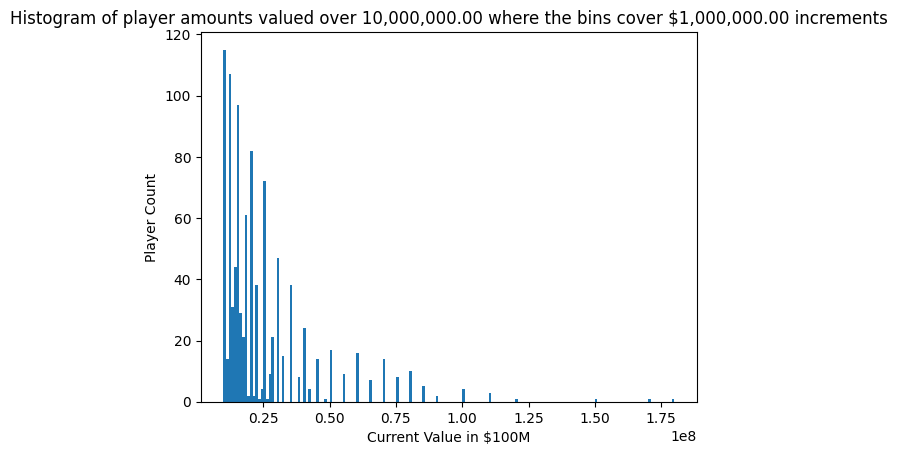

In [11]:
# Set data fields
y = df.loc[:,'current_value']

# Set histogram parameters
binwidth = 1000000
binrange=np.arange(10000000, max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.title('Histogram of player amounts valued over 10,000,000.00 where the bins cover $1,000,000.00 increments')
plt.xlabel('Current Value in $100M')
plt.ylabel('Player Count')
plt.show()

The distribution of values is skewed right and unimodal, as is common in distributions of small, non-negative quantities.

#### Histogram of player amounts where the bins cover $1,000,000 increments

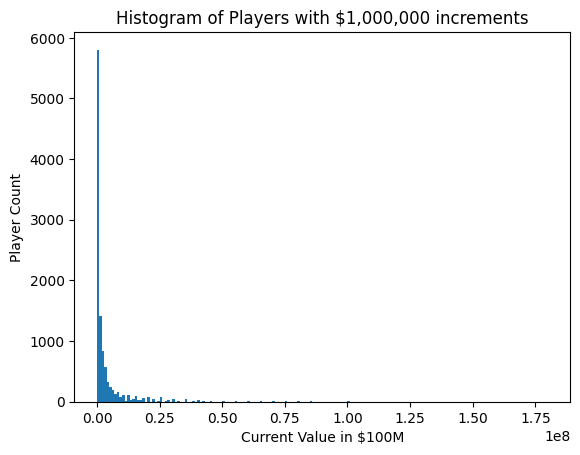

180000000


In [12]:
# Set data fields

y = df.loc[:,'current_value']

# Set histogram parameters
binwidth = 1000000
binrange=np.arange(min(y), max(y) + binwidth, binwidth)
# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Current Value in $100M')
plt.ylabel('Player Count')
plt.title('Histogram of Players with $1,000,000 increments')
plt.show()
print(y.max())


#### Scatterplot of each feature vs. current value

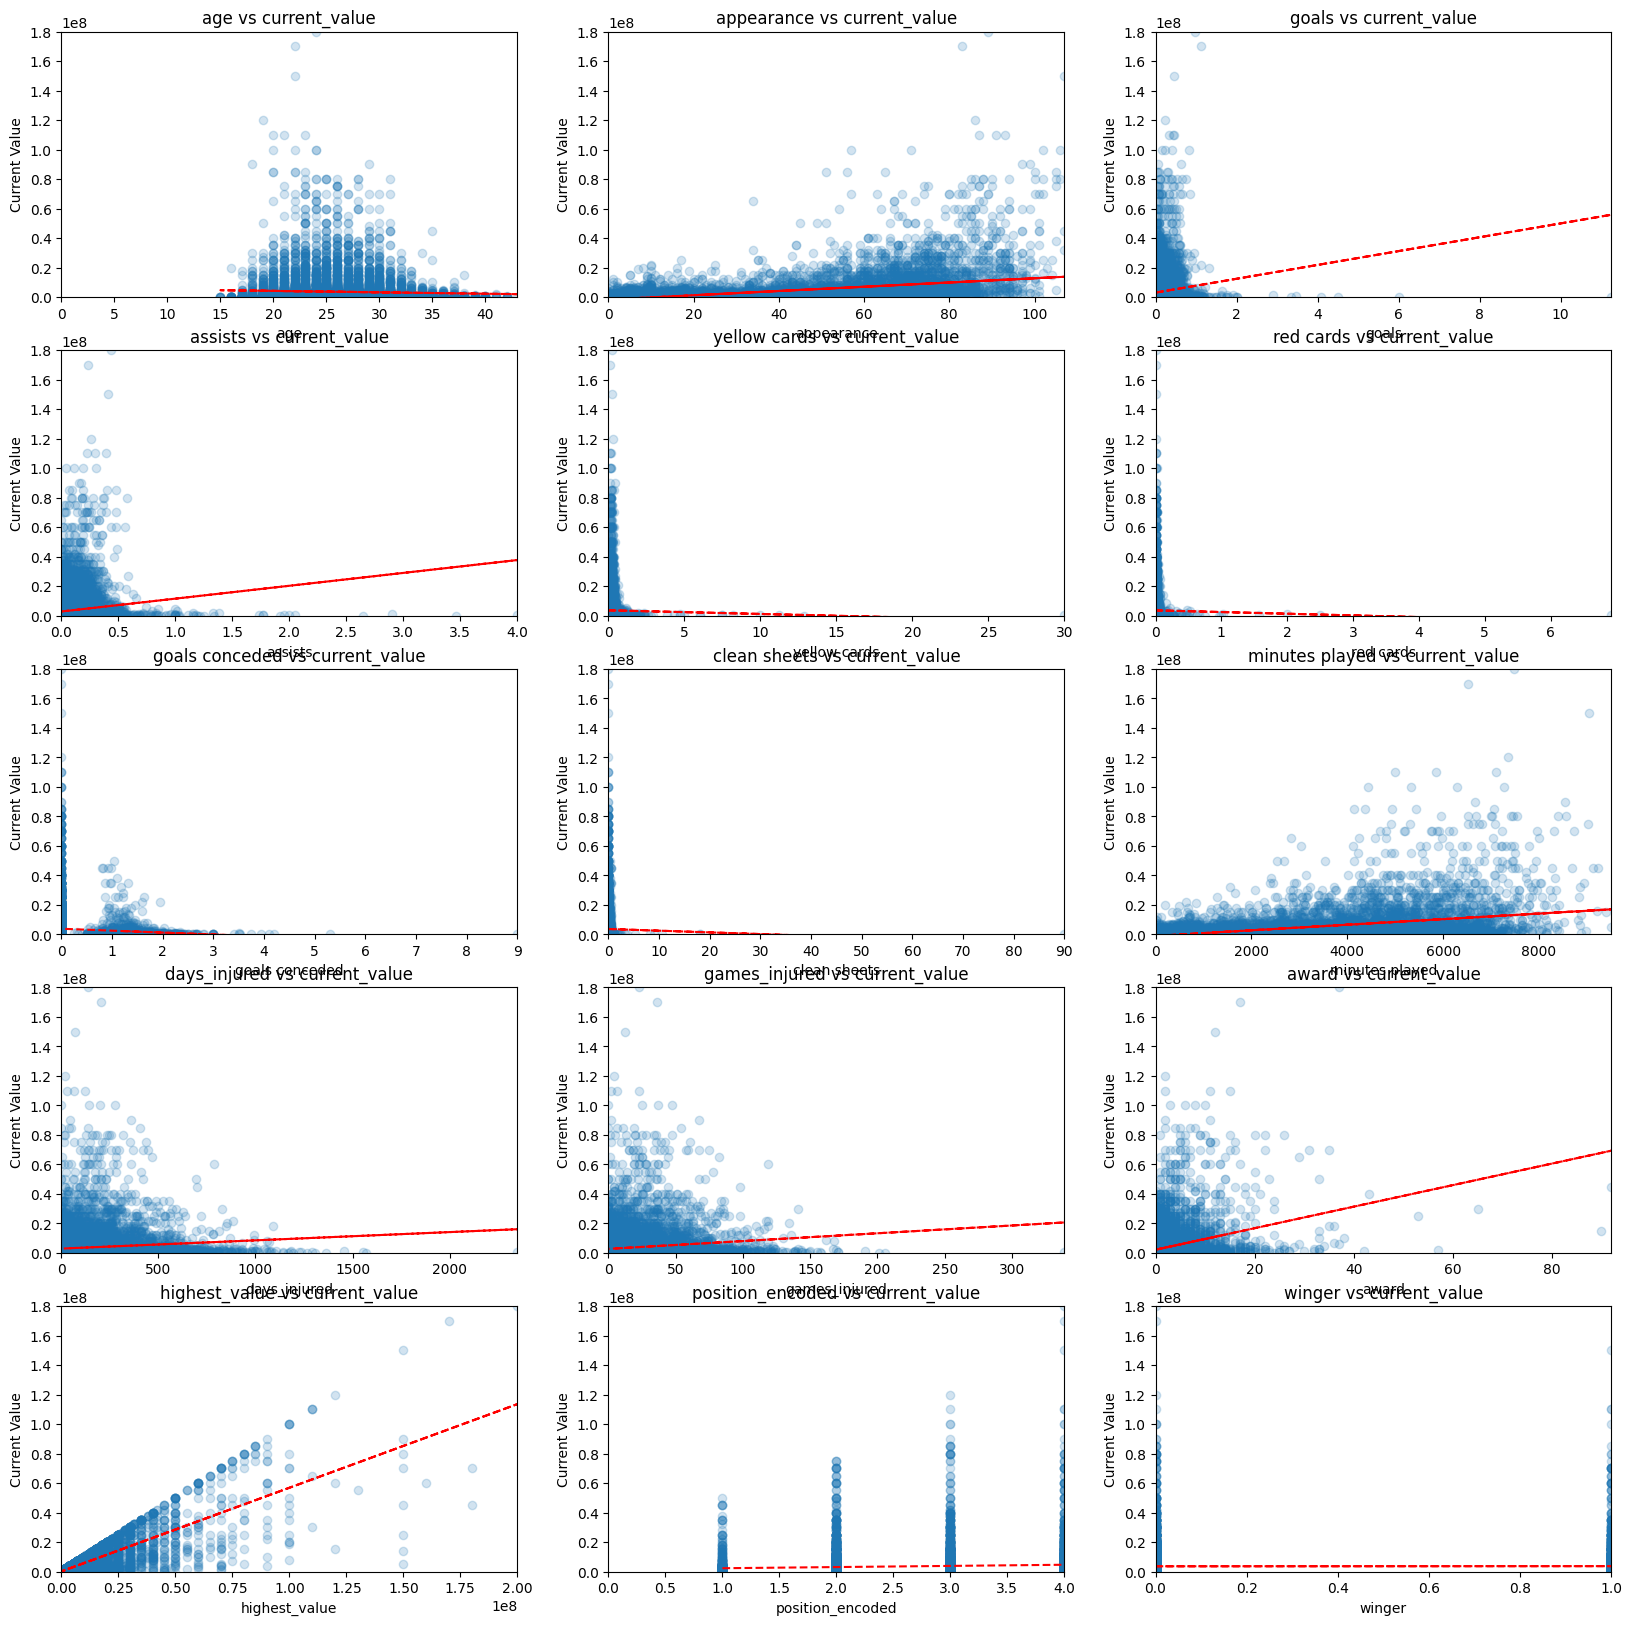

In [22]:
# Set data fields
plt.figure(figsize=(20, 20))
for i in features:
  x = df.loc[:,i]
  y = df.loc[:,'current_value']

  # Generate trendline
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  plt.subplot(5, 3, features.index(i)+1)
  # Show plot
  plt.plot(x,p(x), 'r--')
  plt.scatter(x, y, alpha=0.2)
  plt.xlim(0,np.max(df.loc[:,i]))
  plt.ylim(0,np.max(df.loc[:,'current_value']))
  plt.xlabel(i)
  plt.ylabel('Current Value')
  plt.title(f"{i} vs current_value")
plt.show()

Regression model is not sufficient to explain current value as it does not take in the factors such as some features are more related with some positions. Regression coefficient of red cards, yellow cards, and goals conceded being positive is unexpected. Most of the features does not have linear relation. Age, appereance and minitues played are corelated. A dual ratio of those can create more insights.

## Linear Regression Model for Each Positions Encoded.

utexas_ds_orie_divider_gray.png

In [14]:
w = 'current_value'
for i in range(1,5):
  exec(f'df_{i} = df[df["position_encoded"]==i]')
  exec(f'x_{i}=df_{i}.loc[:,features]')
  exec(f'y_{i}=df_{i}.loc[:,w]')
  exec(f'regr_{i}= linear_model.LinearRegression()')
  exec(f'x_train_{i},x_test_{i},y_train_{i},y_test_{i} = train_test_split(x_{i}, y_{i}, train_size=0.8, test_size=0.2,random_state=1)')

print(get_linear_regr_mae(x_train_1, x_test_1, y_train_1, y_test_1))
print(get_linear_regr_mae(x_train_2, x_test_2, y_train_2, y_test_2))
print(get_linear_regr_mae(x_train_3, x_test_3, y_train_3, y_test_3))
print(get_linear_regr_mae(x_train_4, x_test_4, y_train_4, y_test_4))


(1241695.5871667543, 0.7788698351576724)
(1813597.4102528328, 0.7878457931409495)
(2449944.650502736, 0.7848881912302045)
(2872533.9967129873, 0.7484320633451857)


Here are the MAE and R2 values of regression created for each position type

R2 is greater than before